# Chapter 4: Training Models

So far we have treated machine learning models and their training algorithms
mostly like black boxes. If you went through some of the exercises in the
previous chapters, you may have been surprised by how much you can get
done without knowing anything about what’s under the hood: you optimized
a regression system, you improved a digit image classifier, and you even built
a spam classifier from scratch, all without knowing how they actually work.
Indeed, in many situations you don’t really need to know the implementation
details. <br>
However, having a good understanding of how things work can help you
quickly home in on the appropriate model, the right training algorithm to use,
and a good set of hyperparameters for your task. Understanding what’s under
the hood will also help you debug issues and perform error analysis more
efficiently. Lastly, most of the topics discussed in this chapter will be
essential in understanding, building, and training neural networks.

## Linear Regression

A linear model makes a prediction by simply computing a
weighted sum of the input features, plus a constant called the bias term (also
called the intercept term):

$$ \hat{y} = {\theta_0}*0 + {\theta_1}*x_1 + {\theta_2}*x_2 +...+ {\theta_n}*x_n$$

In this equation:
- ŷ is the predicted value.
- n is the number of features.
- x is the i feature value.
- θ is the j model parameter, including the bias term θ and the feature
weights θ , θ , ⋯, θ .

OK, that’s the linear regression model—but how do we train it? Well, recall
that training a model means setting its parameters so that the model best fits
the training set. For this purpose, we first need a measure of how well (or
poorly) the model fits the training data. In Chapter 2 we saw that the most
common performance measure of a regression model is the **root mean square
error**. Therefore, to train a linear regression model, we need to
find the value of θ that minimizes the RMSE. In practice, it is simpler to
minimize the **mean squared error** (MSE) than the RMSE, and it leads to the
same result (because the value that minimizes a positive function also
minimizes its square root).

$$MSE = \frac{1}{n} \sum_{i=1}^{n}(y_i - \hat{y_i})^2$$



### Normal Equation

To find the value of θ that minimizes the MSE, there exists a closed-form
solution—in other words, a mathematical equation that gives the result
directly. This is called the Normal equation:
$$\hat{\theta} = (X^T X)^{-1} X^T y$$

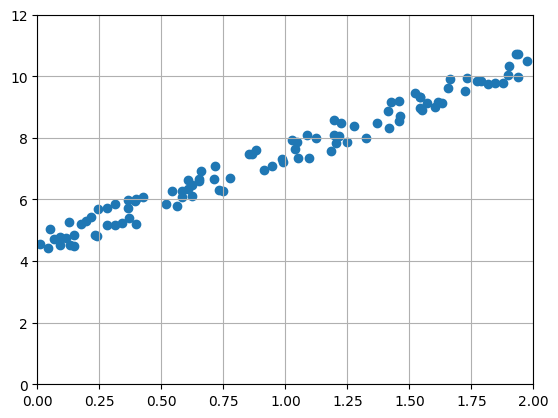

In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)
m = 100 # of instances
X = 2*np.random.rand(m, 1) # column vector
y = 4 + 3*X + np.random.rand(m, 1) # column vector

plt.axis([0,2,0,12])
plt.grid()
plt.scatter(X, y)
plt.show()

Now let's compute $\hat{\theta}$ using the Normal equation. We will use the inv()
function from NumPy’s linear algebra module (np.linalg) to compute the
inverse of a matrix, and the dot() method for matrix multiplication:

In [2]:
from sklearn.preprocessing import add_dummy_feature

X_b = add_dummy_feature(X)
theta_best = np.linalg.inv(X_b.T @X_b) @ X_b.T @ y

In [3]:
theta_best

array([[4.51359766],
       [2.98323418]])

We would have hoped for θ = 4 and θ = 3 instead of θ = 4.215 and θ =
2.770. Close enough, but the noise made it impossible to recover the exact
parameters of the original function. The smaller and noisier the dataset, the
harder it gets.
Now we can make predictions using $\hat{\theta}$:


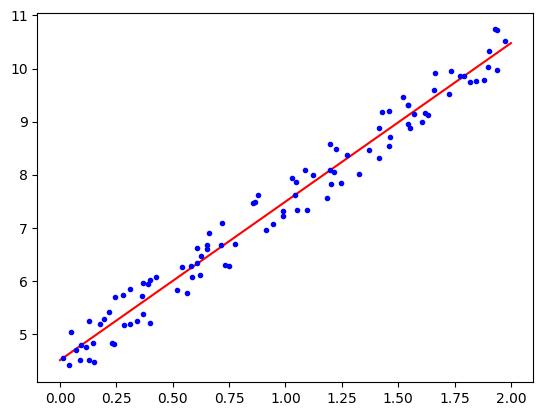

In [4]:
X_new = np.array([[0], [2]])
X_new_b = add_dummy_feature(X_new) # add x0 = 1 to each instance
y_predict = X_new_b @ theta_best

plt.plot(X_new, y_predict, "r-", label="Predictions")
plt.plot(X, y, "b.")
[...] # beautify the figure: add labels, axis, grid, and legend
plt.show()

### Computational Complexity

The Normal equation computes the inverse of X X, which is an (n + 1) × (n + 1) matrix (where n is the number of features). The computational
complexity of inverting such a matrix is typically about O($n^2.4$) to O($n^3$),
depending on the implementation. In other words, if you double the number
of features, you multiply the computation time by roughly $2^2.4 =5.3 to 2^3 = 8$
The SVD approach used by Scikit-Learn’s LinearRegression class is about
O(n^2). If you double the number of features, you multiply the computation
time by roughly 4.

## Gradient Descent

Gradient descent is a generic optimization algorithm capable of finding
optimal solutions to a wide range of problems. The general idea of gradient
descent is to tweak parameters iteratively in order to minimize a cost
function. <br>
Suppose you are lost in the mountains in a dense fog, and you can only feel
the slope of the ground below your feet. A good strategy to get to the bottom
of the valley quickly is to go downhill in the direction of the steepest slope.
This is exactly what gradient descent does: it measures the local gradient of
the error function with regard to the parameter vector θ, and it goes in the
direction of descending gradient. Once the gradient is zero, you have reached
a minimum!<br>
Additionally, not all cost functions look like nice, regular bowls. There may
be holes, ridges, plateaus, and all sorts of irregular terrain, making
convergence to the minimum difficult.<br>
Fortunately, the MSE cost function for a linear regression model happens to
be a convex function, which means that if you pick any two points on the
curve, the line segment joining them is never below the curve. This implies
that there are no local minima, just one global minimum.<br>
This diagram also illustrates the fact that training a model means searching
for a combination of model parameters that minimizes a cost function (over
the training set). It is a search in the model’s parameter space. The more
parameters a model has, the more dimensions this space has, and the harder
the search is: searching for a needle in a 300-dimensional haystack is much
trickier than in 3 dimensions<br>

### Batch Gradient Descent

To implement gradient descent, you need to compute the gradient of the cost
function with regard to each model parameter θ. The partial
derivative of the MSE with regard to parameter θ:
$$\frac{\partial}{\partial\theta}\text{MSE} = \frac{2}{N} \sum_{i=1}^{N} (f(x_i,\theta) - y_i) \frac{\partial f(x_i,\theta)}{\partial\theta}$$
Just look at a quick implementation of this algorithm:

In [7]:
eta = 0.099
n_epochs = 1100
m = len(X_b)

np.random.seed(42)
theta = np.random.randn(2,1)

for epoch in range(n_epochs):
    gradients = 2/m * X_b.T @ (X_b @ theta - y)
    theta = theta - eta * gradients

In [8]:
theta

array([[4.51359766],
       [2.98323418]])

### Stochastic Gradient Descent

The main problem with batch gradient descent is the fact that it uses the
whole training set to compute the gradients at every step, which makes it very
slow when the training set is large. At the opposite extreme, stochastic
gradient descent picks a random instance in the training set at every step and
computes the gradients based only on that single instance. Obviously,
working on a single instance at a time makes the algorithm much faster
because it has very little data to manipulate at every iteration. It also makes it
possible to train on huge training sets, since only one instance needs to be in
memory at each iteration. <br>
On the other hand, due to its stochastic (i.e., random) nature, this algorithm is
much less regular than batch gradient descent: instead of gently decreasing
until it reaches the minimum, the cost function will bounce up and down,
decreasing only on average. Over time it will end up very close to the
minimum, but once it gets there it will continue to bounce around, never
settling down. Once the algorithm stops, the final parameter
values will be good, but not optimal.<br>
When the cost function is very irregular, this can actually
help the algorithm jump out of local minima, so stochastic gradient descent
has a better chance of finding the global minimum than batch gradient
descent does.<br>
Therefore, randomness is good to escape from local optima, but bad because
it means that the algorithm can never settle at the minimum. One solution to
this dilemma is to **gradually reduce the learning rate**. The steps start out large
(which helps make quick progress and escape local minima), then get smaller
and smaller, allowing the algorithm to settle at the global minimum. This
process is akin to simulated annealing, an algorithm inspired by the process
in metallurgy of annealing, where molten metal is slowly cooled down. **The
function that determines the learning rate at each iteration is called the
learning schedule**. If the learning rate is reduced too quickly, you may get
stuck in a local minimum, or even end up frozen halfway to the minimum. If
the learning rate is reduced too slowly, you may jump around the minimum
for a long time and end up with a suboptimal solution if you halt training too
early.



In [10]:
n_epochs = 50
t0, t1 = 5, 50 # learning schedule hyperparameters

def learning_schedule(t):
    return t0 / (t+t1)

np.random.seed(42)
theta = np.random.randn(2,1)

for epoch in range(n_epochs):
    for iteration in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index : random_index + 1]
        yi = y[random_index : random_index + 1]
        gradients = 2 * xi.T @ (xi @ theta - yi) # for SGD, do not divide by m
        eta = learning_schedule(epoch * m + iteration)
        theta = theta - eta * gradients
        
theta

array([[4.51548062],
       [2.9775157 ]])

To perform linear regression using stochastic GD with Scikit-Learn, you can
use the SGDRegressor class, which defaults to optimizing the MSE cost
function. The following code runs for maximum 1,000 epochs (max_iter) or
until the loss drops by less than 10 (tol) during 100 epochs
(n_iter_no_change). It starts with a learning rate of 0.01 (eta0), using the
default learning schedule (different from the one we used). Lastly, it does not
use any regularization (penalty=None; more details on this shortly):

In [14]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-5, penalty=None, eta0=0.01,
n_iter_no_change=100, random_state=42)
sgd_reg.fit(X, y.ravel()) # y.ravel() because fit() expects 1D targets


SGDRegressor(n_iter_no_change=100, penalty=None, random_state=42, tol=1e-05)

### Mini-Batch Gradient Descent

The last gradient descent algorithm we will look at is called mini-batch
gradient descent. It is straightforward once you know batch and stochastic
gradient descent: at each step, instead of computing the gradients based on
the full training set (as in batch GD) or based on just one instance (as in
stochastic GD), mini-batch GD computes the gradients on small random sets
of instances called mini-batches. The main advantage of mini-batch GD over
stochastic GD is that you can get a performance boost from hardware
optimization of matrix operations, especially when using GPUs. <br>
The algorithm’s progress in parameter space is less erratic than with
stochastic GD, especially with fairly large mini-batches. As a result, mini￾batch GD will end up walking around a bit closer to the minimum than
stochastic GD—but it may be harder for it to escape from local minima (in
the case of problems that suffer from local minima, unlike linear regression
with the MSE cost function). <br>

In [15]:
import numpy as np

def mini_batch_gradient_descent(X, y, alpha=0.01, epochs=100, batch_size=32):
    m, n = X.shape
    theta = np.random.randn(n)  # initialize theta with zeros
    num_batches = int(np.ceil(m / batch_size))  # calculate number of batches

    for epoch in range(epochs):
        indices = np.random.permutation(m)  # shuffle indices of training examples
        X_shuffled, y_shuffled = X[indices], y[indices]  # shuffle training examples

        for i in range(num_batches):
            start_index = i * batch_size
            end_index = min((i+1) * batch_size, m)
            X_batch = X_shuffled[start_index:end_index]  # select a batch of training examples
            y_batch = y_shuffled[start_index:end_index]

            h_batch = X_batch.dot(theta)  # calculate predictions for the batch
            error_batch = h_batch - y_batch  # calculate errors for the batch
            gradient = X_batch.T.dot(error_batch) / batch_size  # calculate gradient for the batch
            theta -= alpha * gradient  # update theta for the batch

    return theta


## Polynomial Regression

What if your data is more complex than a straight line? Surprisingly, you can
use a linear model to fit nonlinear data. A simple way to do this is to add
powers of each feature as new features, then train a linear model on this
extended set of features. This technique is called polynomial regression.

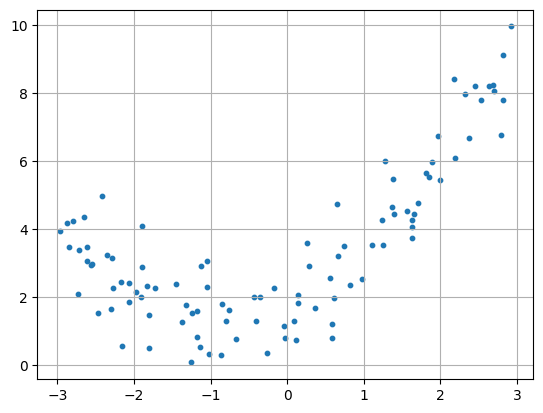

In [18]:
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m,1) -3
y = 0.5*X**2 + X + 2 + np.random.randn(m,1)

plt.grid()
plt.scatter(X,y,s=10,linewidths=1)
plt.show()

[1.78134581] [[0.93366893 0.56456263]]


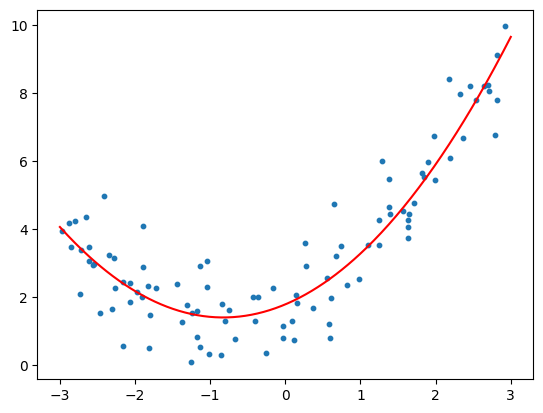

In [26]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
print(lin_reg.intercept_, lin_reg.coef_)

x_draw = poly_features.transform(np.linspace(-3,3,300).reshape(300,1))
y_draw = lin_reg.predict(x_draw)
plt.plot(np.linspace(-3,3,300), y_draw, color='red')
plt.scatter(X,y,s=10,linewidths=1)
plt.show()

## Learning Curves

If a model performs well on the training data but
generalizes poorly according to the cross-validation metrics, then your model
is overfitting. If it performs poorly on both, then it is underfitting. This is one
way to tell when a model is too simple or too complex.

Another way to tell is to look at the learning curves, which are plots of the
model’s training error and validation error as a function of the training
iteration: just evaluate the model at regular intervals during training on both
the training set and the validation set, and plot the results. If the model cannot
be trained incrementally (i.e., if it does not support partial_fit() or
warm_start), then you must train it several times on gradually larger subsets
of the training set.

Scikit-Learn has a useful learning_curve() function to help with this: it trains
and evaluates the model using cross-validation. By default it retrains the
model on growing subsets of the training set, but if the model supports
incremental learning you can set exploit_incremental_learning=True when
calling learning_curve() and it will train the model incrementally instead. The
function returns the training set sizes at which it evaluated the model, and the
training and validation scores it measured for each size and for each cross￾validation fold. Let’s use this function to look at the learning curves of the
plain linear regression model:






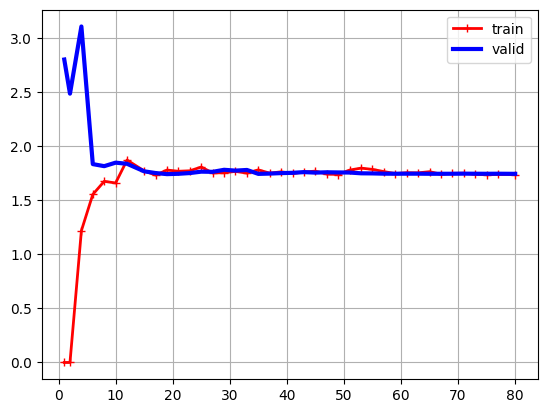

In [28]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, valid_scores = learning_curve(
LinearRegression(), X, y, train_sizes=np.linspace(0.01, 1.0, 40), cv=5,
scoring="neg_root_mean_squared_error")
train_errors = -train_scores.mean(axis=1)
valid_errors = -valid_scores.mean(axis=1)

plt.grid()
plt.plot(train_sizes, train_errors, "r-+", linewidth=2, label="train")
plt.plot(train_sizes, valid_errors, "b-", linewidth=3, label="valid")
plt.legend()
 # beautify the figure: add labels, axis, grid, and legend
plt.show()